In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from alphapackage import *

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
close = pd.read_csv("../csv_data/close.csv", index_col=0, parse_dates=True)
high = pd.read_csv("../csv_data/high.csv", index_col=0, parse_dates=True)
low = pd.read_csv("../csv_data/low.csv", index_col=0, parse_dates=True)
open = pd.read_csv("../csv_data/open.csv", index_col=0, parse_dates=True)
volume = pd.read_csv("../csv_data/volume.csv", index_col=0, parse_dates=True)

***

## Построение альфа стратегий

In [4]:
high_low_diff = high.sub(low)
alpha1_raw = high_low_diff.div(close)
alpha1 = normalize(neutralize(alpha1_raw))
alpha1

,A,AACG,AAMI,AAOI,AAPL,AAT,ABBV,ABCB,ABEV,ABG,...,YDKG,YELP,YPF,ZBRA,ZEUS,ZG,ZTR,ZTS,ZUMZ,ZWS
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,-0.000665,-0.000851,-0.000394,0.000392,-0.000267,-0.000107,-0.000219,-0.000003,-0.000490,-0.000551,...,-0.000770,0.000536,0.000311,-0.000303,0.001981,0.000620,-0.000940,-0.000678,0.001544,0.000133
2016-01-05,-0.000752,0.000044,-0.000233,0.000520,-0.000024,-0.000022,-0.000362,-0.000392,-0.000526,0.000333,...,-0.000920,0.000522,0.000059,-0.000110,-0.000297,0.000575,-0.001183,-0.000672,0.000124,0.001082
2016-01-06,-0.000462,0.002690,0.000219,-0.000349,-0.000401,-0.000793,-0.000428,-0.000869,-0.000535,0.002917,...,-0.000518,0.000518,0.001028,0.000292,0.000597,-0.000302,-0.001099,-0.000476,0.000056,-0.000281
2016-01-07,-0.000205,0.003146,0.000450,0.001043,-0.000074,-0.000732,-0.000471,-0.000561,-0.000453,-0.000059,...,-0.000913,0.000262,0.001464,0.000564,0.000842,-0.000093,-0.000804,-0.000128,0.003334,-0.000037
2016-01-08,-0.000304,0.002233,-0.000933,0.000965,-0.000566,-0.000690,0.000020,-0.000456,-0.000815,0.000722,...,-0.000950,0.000486,-0.000215,-0.000805,0.000754,-0.000328,-0.001034,0.000019,0.000388,-0.000058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,-0.000627,0.003135,-0.000390,-0.000613,-0.000535,-0.000511,-0.000965,-0.000401,-0.000910,-0.000069,...,0.005359,-0.000537,0.001572,0.000501,0.000443,-0.000102,-0.001189,-0.000722,0.000487,-0.000734
2021-12-28,-0.000815,0.001053,-0.000443,0.000041,-0.000581,-0.000732,-0.000778,0.000506,-0.000457,-0.000026,...,0.007532,-0.000315,0.000504,-0.000129,0.000336,0.000574,-0.001006,-0.000508,-0.000073,-0.000734
2021-12-29,-0.000647,0.005195,-0.000380,0.000741,-0.000640,-0.000786,-0.000675,-0.000370,-0.000593,-0.000359,...,0.004845,-0.000062,0.000498,-0.000744,-0.000020,0.000101,-0.001159,-0.000470,0.000198,-0.000742


<Axes: title={'center': 'График накопленной доходности за всю историю'}, xlabel='T', ylabel='cumpnl'>

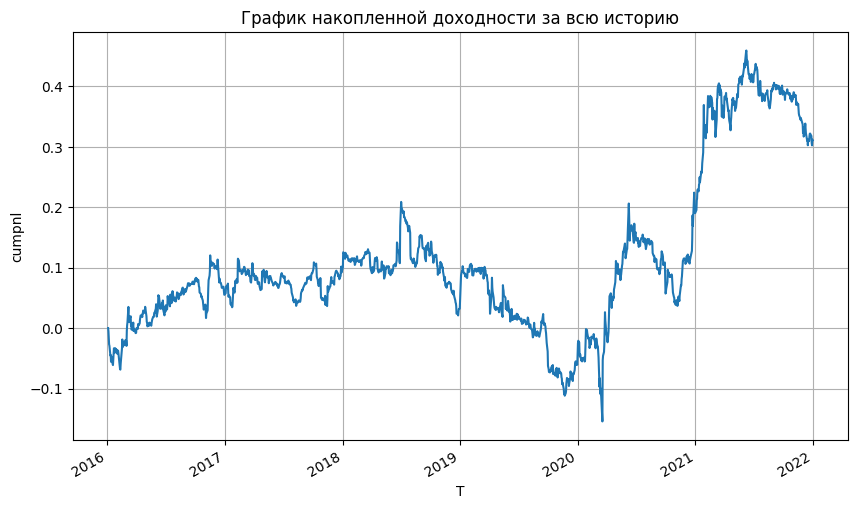

In [ ]:
stats1 = AlphaStats(close, alpha1)
stats1.plot_cumpnl()
# stats1.

In [ ]:
stats1.print_Sharpe_ratios()

Коэффициент Шарпа за 2016 год: 0.4677477438213329
Коэффициент Шарпа за 2017 год: 0.3612602866520149
Коэффициент Шарпа за 2018 год: -0.4642436536868079
Коэффициент Шарпа за 2019 год: -0.7364346144372255
Коэффициент Шарпа за 2020 год: 1.1639807862397802
Коэффициент Шарпа за 2021 год: 0.7184263167325662




***

$$ \alpha_{1} = \frac{high * low}{close^2}$$

In [43]:
double_close = close * close
alpha2_raw = (high * low).div(double_close)
alpha2 = normalize(neutralize(alpha2_raw))
alpha2 = decay(alpha2, n=5)
alpha2 = CutMiddle(alpha2, 600)
stats2 = AlphaStats(close, alpha2)

Коэффициент Шарпа за 2016 год: 6.164575087968298
Коэффициент Шарпа за 2017 год: 3.8514694534074154
Коэффициент Шарпа за 2018 год: 4.852773590701701
Коэффициент Шарпа за 2019 год: 2.9736043858435757
Коэффициент Шарпа за 2020 год: 2.7372332513923374
Коэффициент Шарпа за 2021 год: 3.3534807505165594


Максимальная просадка за 2016 год: 0.033983983982806276
Максимальная просадка за 2017 год: 0.05343358180337776
Максимальная просадка за 2018 год: 0.0333074375590372
Максимальная просадка за 2019 год: 0.039381001594184006
Максимальная просадка за 2020 год: 0.15619951088689632
Максимальная просадка за 2021 год: 0.03907307731042975


Средний оборот за 2016 год: 0.6522523592775192
Средний оборот за 2017 год: 0.655322505163604
Средний оборот за 2018 год: 0.6618606953202245
Средний оборот за 2019 год: 0.6586768377857295
Средний оборот за 2020 год: 0.6785415355280839
Средний оборот за 2021 год: 0.6823665755213626


Суммарная доходность за 2016 год: 0.460081704875498
Суммарная доходность за 2017 год

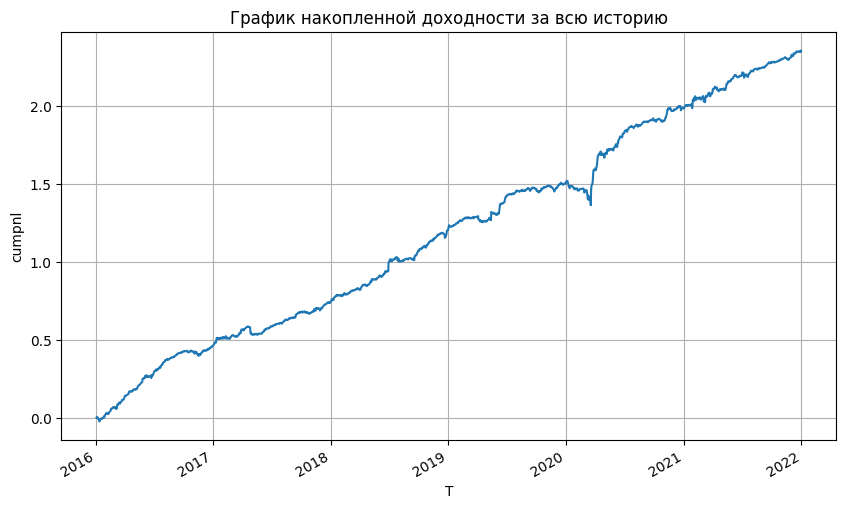

In [44]:
stats2.plot_cumpnl()
stats2.print_Sharpe_ratios()
stats2.print_drawdowns()
stats2.print_turnovers()
stats2.print_sum_pnls()

***

$$ \alpha_{2} = - \frac{close - low}{high - low} $$

Коэффициент Шарпа за 2016 год: 7.0005435402107015
Коэффициент Шарпа за 2017 год: 6.988249332422678
Коэффициент Шарпа за 2018 год: 7.850549915420468
Коэффициент Шарпа за 2019 год: 6.6115751358123696
Коэффициент Шарпа за 2020 год: 3.7210266403184526
Коэффициент Шарпа за 2021 год: 4.346395678012555


Средний оборот за 2016 год: 0.33825801734265565
Средний оборот за 2017 год: 0.5527810230239575
Средний оборот за 2018 год: 0.6895596582614258
Средний оборот за 2019 год: 0.667663489769562
Средний оборот за 2020 год: 0.8041665300007818
Средний оборот за 2021 год: 0.8081095517026067


Максимальная просадка за 2016 год: 0.0031683190894130353
Максимальная просадка за 2017 год: 0.006204613551801741
Максимальная просадка за 2018 год: 0.007274972638030008
Максимальная просадка за 2019 год: 0.004918506332876493
Максимальная просадка за 2020 год: 0.05069516327119983
Максимальная просадка за 2021 год: 0.014745165215730438


Суммарная доходность за 2016 год: 0.14605077206166164
Суммарная доходность за 2

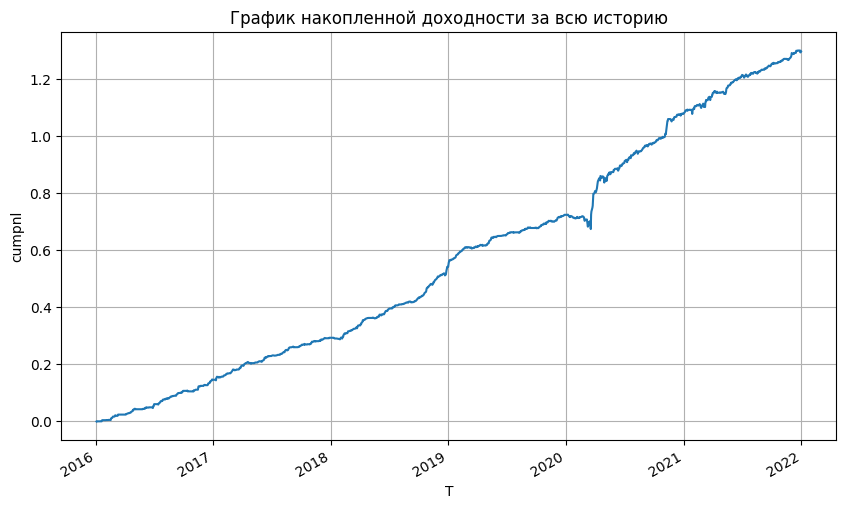

In [ ]:
close_over_high = - (close - low) / (high - low)
alpha3 = normalize(neutralize(close_over_high))
alpha3 = decay(alpha3, 3)
stats3 = AlphaStats(close, alpha3)
stats3.plot_cumpnl()
stats3.print_all_stats()

***

$$ \alpha = \frac{high + low}{2} < close ? 1 : -1 $$

<Axes: title={'center': 'График накопленной доходности за всю историю'}, xlabel='T', ylabel='cumpnl'>

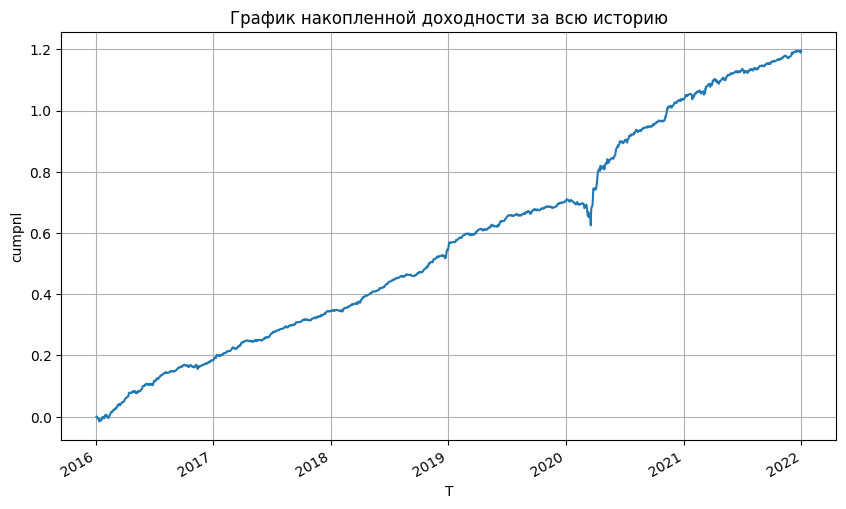

In [79]:
mask = (-close_over_high) < 0.5
alpha4 = alpha3.copy()
alpha4[mask] = 1
alpha4[~mask] = -1
alpha4 = normalize(neutralize(alpha4))
alpha4 = decay(alpha4, 8)
stats4 = AlphaStats(close, alpha4)
stats4.plot_cumpnl()

In [80]:
stats4.print_all_stats()

Коэффициент Шарпа за 2016 год: 5.339126329326656
Коэффициент Шарпа за 2017 год: 6.863829701543744
Коэффициент Шарпа за 2018 год: 6.460412778893745
Коэффициент Шарпа за 2019 год: 4.882955940013706
Коэффициент Шарпа за 2020 год: 3.589653519030355
Коэффициент Шарпа за 2021 год: 3.488265346299239


Средний оборот за 2016 год: 0.581971772186555
Средний оборот за 2017 год: 0.6033195721409694
Средний оборот за 2018 год: 0.5959915113879324
Средний оборот за 2019 год: 0.6070199169969247
Средний оборот за 2020 год: 0.6076174227545947
Средний оборот за 2021 год: 0.6099658891497632


Максимальная просадка за 2016 год: 0.016166324341192966
Максимальная просадка за 2017 год: 0.005705090687396441
Максимальная просадка за 2018 год: 0.0101585799945344
Максимальная просадка за 2019 год: 0.009259421092488562
Максимальная просадка за 2020 год: 0.08463762903812722
Максимальная просадка за 2021 год: 0.01722490466552884


Суммарная доходность за 2016 год: 0.1832064856654138
Суммарная доходность за 2017 год: 

***
$$ \alpha_{3} = \frac{open}{close} $$

In [27]:
alpha5 = open.div(close)
alpha5 = normalize(neutralize(alpha5))
alpha5 = decay(alpha5, 5)
stats5 = AlphaStats(close, alpha5)

Коэффициент Шарпа за 2016 год: 3.666084812756535
Коэффициент Шарпа за 2017 год: 3.4308699642950136
Коэффициент Шарпа за 2018 год: 4.3572973377391495
Коэффициент Шарпа за 2019 год: 1.9516061308801047
Коэффициент Шарпа за 2020 год: 1.9888453347820703
Коэффициент Шарпа за 2021 год: 1.3979181726000347


Средний оборот за 2016 год: 0.7190108711269158
Средний оборот за 2017 год: 0.7234130052636166
Средний оборот за 2018 год: 0.7274745779490249
Средний оборот за 2019 год: 0.7158143208095973
Средний оборот за 2020 год: 0.7397862858518415
Средний оборот за 2021 год: 0.7440300890459954


Максимальная просадка за 2016 год: 0.05612591289962615
Максимальная просадка за 2017 год: 0.027568372096192673
Максимальная просадка за 2018 год: 0.031931644140218984
Максимальная просадка за 2019 год: 0.10124182859124176
Максимальная просадка за 2020 год: 0.22248121470201976
Максимальная просадка за 2021 год: 0.06638750958584727


Суммарная доходность за 2016 год: 0.34592560662672456
Суммарная доходность за 201

<Axes: title={'center': 'График накопленной доходности за всю историю'}, xlabel='T', ylabel='cumpnl'>

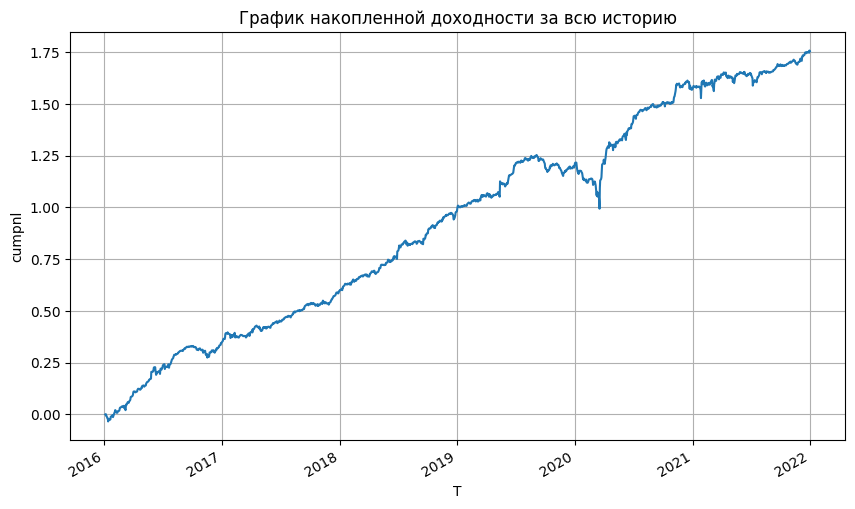

In [28]:
stats5.print_all_stats()
stats5.plot_cumpnl()

***
$$ \alpha_{4} = \frac{high}{close} $$

In [83]:
alpha6 = high.div(close)
alpha6 = normalize(neutralize(alpha6))
alpha6 = decay(alpha6, 5)
stats6 = AlphaStats(close, alpha6)

Коэффициент Шарпа за 2016 год: 3.1158746772168517
Коэффициент Шарпа за 2017 год: 2.4458628287949082
Коэффициент Шарпа за 2018 год: 1.2556201843958998
Коэффициент Шарпа за 2019 год: 0.8308004337507788
Коэффициент Шарпа за 2020 год: 2.2383616424825763
Коэффициент Шарпа за 2021 год: 2.0100617313194666


Средний оборот за 2016 год: 0.35447583226250473
Средний оборот за 2017 год: 0.3498118936115816
Средний оборот за 2018 год: 0.3672987257940948
Средний оборот за 2019 год: 0.353189363644
Средний оборот за 2020 год: 0.37566393657940844
Средний оборот за 2021 год: 0.3618841735695857


Максимальная просадка за 2016 год: 0.0613072774816214
Максимальная просадка за 2017 год: 0.046109264728414256
Максимальная просадка за 2018 год: 0.07507288495305531
Максимальная просадка за 2019 год: 0.0988934333227176
Максимальная просадка за 2020 год: 0.1579768958378479
Максимальная просадка за 2021 год: 0.07580909342054021


Суммарная доходность за 2016 год: 0.3324049502628791
Суммарная доходность за 2017 год:

<Axes: title={'center': 'График накопленной доходности за всю историю'}, xlabel='T', ylabel='cumpnl'>

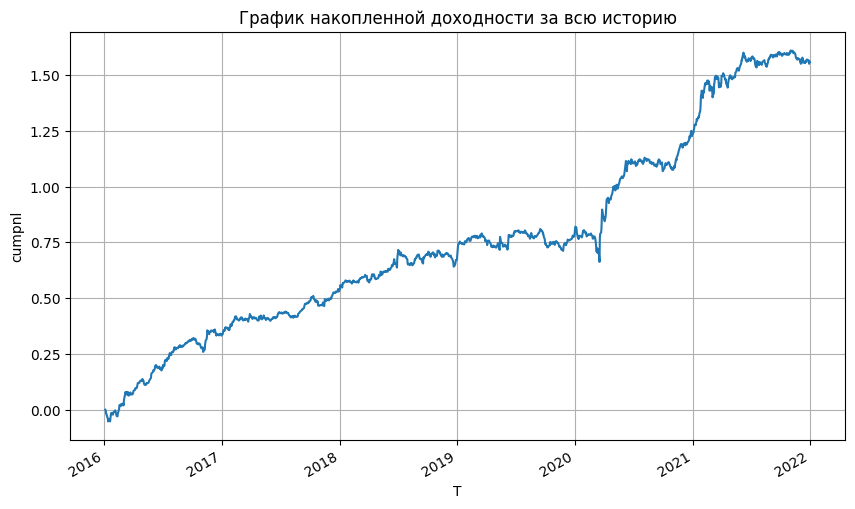

In [84]:
stats6.print_all_stats()
stats6.plot_cumpnl()

***

In [53]:
revers = close.shift(5) / close.shift(1) - 1
alpha7 = revers * rank_df(volume)
alpha7 = normalize(neutralize(alpha7))

Коэффициент Шарпа за 2016 год: 0.6611334881330186
Коэффициент Шарпа за 2017 год: 0.6686160277964996
Коэффициент Шарпа за 2018 год: 0.44005168874510087
Коэффициент Шарпа за 2019 год: 1.1615969456933024
Коэффициент Шарпа за 2020 год: 2.324807012402443
Коэффициент Шарпа за 2021 год: -0.275205544843163


Средний оборот за 2016 год: 0.7031472339610647
Средний оборот за 2017 год: 0.7179625994975138
Средний оборот за 2018 год: 0.7084400793898923
Средний оборот за 2019 год: 0.7067319418108249
Средний оборот за 2020 год: 0.7237413869108973
Средний оборот за 2021 год: 0.7218950354835606


Максимальная просадка за 2016 год: 0.05790989512495245
Максимальная просадка за 2017 год: 0.057826410447384374
Максимальная просадка за 2018 год: 0.18301337282942604
Максимальная просадка за 2019 год: 0.10214908921325494
Максимальная просадка за 2020 год: 0.15787130125557072
Максимальная просадка за 2021 год: 0.1762017926523557


Суммарная доходность за 2016 год: 0.05969968754293124
Суммарная доходность за 2017

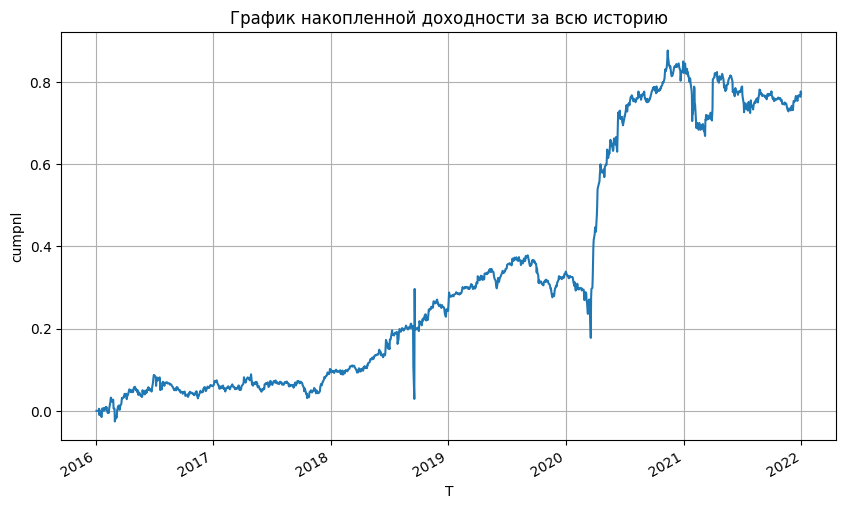

In [55]:
stats7 = AlphaStats(close, alpha7)
stats7.plot_cumpnl()
stats7.print_all_stats()

In [85]:
# TODO: ts_rank method (ts = time-series)
def ts_rank(df : pd.DataFrame, d : int):
    pass

***

## Сравнение альфа стратегий между собой

In [81]:
returns = calculate_returns(close)

pnl2 = calculate_holding_pnl(alpha2, returns)
pnl3 = calculate_holding_pnl(alpha3, returns)
pnl4 = calculate_holding_pnl(alpha4, returns)
pnl5 = calculate_holding_pnl(alpha5, returns)
pnl6 = calculate_holding_pnl(alpha6, returns)

print(f"Корреляция альф между собой:",
      calculate_alphas_corr(pnl2, pnl3),
      calculate_alphas_corr(pnl2, pnl4),
      calculate_alphas_corr(pnl2, pnl5),
      calculate_alphas_corr(pnl2, pnl6),
      calculate_alphas_corr(pnl3, pnl4),
      calculate_alphas_corr(pnl3, pnl5),
      calculate_alphas_corr(pnl3, pnl6),
      calculate_alphas_corr(pnl5, pnl6),
    sep="\n")

Корреляция альф между собой:
0.7036838192790866
0.7546108384279424
0.8887894251034488
0.5875492716296492
0.8244179134010056
0.6544149609630685
0.47789096369054646
0.4220315010904467


In [82]:
print(calculate_alphas_corr(pnl4, pnl2),
calculate_alphas_corr(pnl4, pnl3),
calculate_alphas_corr(pnl4, pnl5),
calculate_alphas_corr(pnl4, pnl6))

0.7546108384279423 0.8244179134010056 0.6883427968570798 0.5074987872467068
